# **런타임 유형을 GPU로 변경한다.**

# 7. 이미지를 위한 인공 신경망 CNN

## 7.1 합성곱 신경망의 구성 요소

### 7.1.1 합성곱

### 7.1.2 케라스 합성곱 층

In [ ]:
from tensorflow import keras
keras.layers.Conv2D (10, kernel_size = (3,3), activation = 'relu')

In [ ]:
# padding 포함

keras.layers.Conv2D(10, kernel_size = (3,3), activation = 'relu', padding = 'same',
                    strides= 1)

In [ ]:
# pooling (max pooling, average pooling) : 풀링에서는 커널사이즈 만큼 스트라이드
keras.layers.MaxPooling2D(2)

### 7.1.3 합성곱 신경망의 전체 구조

## 7.2 합성곱 신경망을 사용한 이미지 분류

### 7.2.1 패션 MNIST 데이터 불러오기

In [ ]:
# 8.2.1.1 패션 MNIST 데이터 적재
#  정규화 : 0~255  --> 0~1
#  데이터 형상 :(50000,28,28)  --> (50000,28,28,1)  채널 차원 추가 
#  검증데이터 20% 분리

from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = \
  keras.datasets.fashion_mnist.load_data()

train_scaled = train_input.reshape(-1, 28,28,1) / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size =0.2, random_state=42
)

4431872/4422102 [==============================] - 0s 0us/step


### 7.2.2 합성곱 신경망 만들기

* 첫 번째 합성곱층 : 필터 32개, 커널크기 (3,3) , 패딩 았음
* 첫 번째 풀링층 : 최대 풀링, 풀링 크기 (2,2)
* 두 번째 합성곱층 : 필터 64개, 커널크기 (3,3) , 패딩 있음
* 두 번째 풀링층 : 최대풀링, 풀링크기 (2,2)
* 1차원 배열로 변환 
* 밀집층 : 100개 출력
* 드롭아웃 층 : 0.4
* 출력층 : 10개
> 활성화 함수 : 중간층 ReLU, 출력층 소프트맥스

In [ ]:
# 7.2.2.1 첫번째 합성곱층 (신경망 입력층): 
#   필터 :32개, 커널 크기: (3,3), 활성화 함수 :ReLU
#   패딩 : 'same',   입력 shape : (28,28,1)

# initiate
model = keras.Sequential()
# first convolution
model.add(keras.layers.Conv2D(32, kernel_size =3, activation='relu', 
                              padding ='same', input_shape =(28,28,1)))

In [ ]:
# 7.2.2.2 풀링층 : 최대 풀링, 풀링크기 (2,2)
# first Pooling
model.add(keras.layers.MaxPooling2D(2))

In [ ]:
# 7.2.2.3 두 번째 합성곱층과 풀링층
#   필터 :64개, 커널 크기: (3,3), 활성화 함수 :ReLU
#   패딩 : 'same'
# 풀링 : 최대풀링 풀링크기 (2,2)

# 2nd convolution
model.add(keras.layers.Conv2D(64,kernel_size=3, activation='relu', 
                              padding='same'))
# 2nd pooling
model.add(keras.layers.MaxPooling2D(2))

In [ ]:
# 7.2.2.4 flatten 층, 밀집층, 드롭아웃 층,  출력증
# 밀집층 출력 100개,  드롭아웃 비율 :0.4
# 출력층 출력 10개

# flatten
model.add(keras.layers.Flatten())

# hidden dense with dropout
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
# output layer
model.add(keras.layers.Dense(10, activation='softmax'))

In [ ]:
# 7.2.2.5 신경망 모델 요약 

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 100)               3

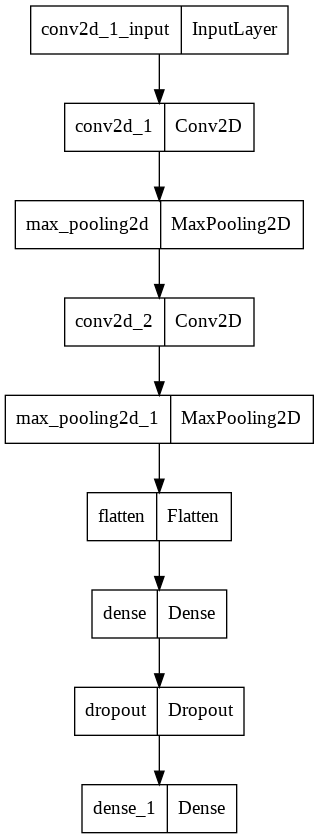

In [ ]:
# 7.2.2.6 모델 흐름 시각화 
keras.utils.plot_model(model)

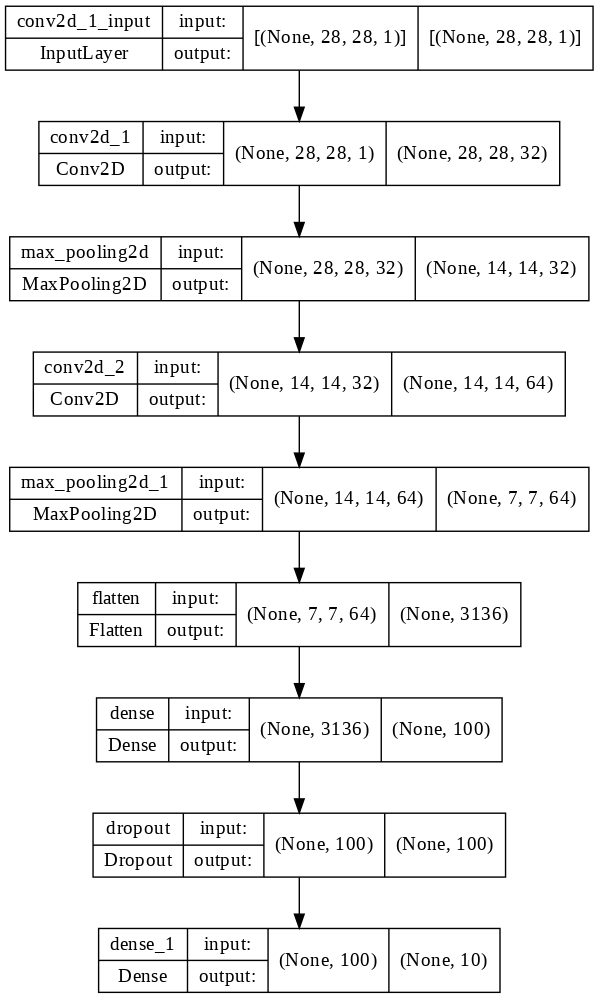

In [ ]:
# 7.2.2.7 모델 흐름 시각화 출력용 해상도로 작성해서 저장
keras.utils.plot_model(model, show_shapes =True, 
                       to_file ='cnn-architecture.png', dpi= 100)

### 7.2.3 모델 컴파일과 훈련

In [ ]:
# 7.2.3.1 모델 학습 환경 설정
# 학습방식 : Adam
# 손실함수 : 교차엔트로피
# 지표 : 정확도 

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', 
              metrics ='accuracy')


In [ ]:
from traitlets.traitlets import validate
# 7.2.3.2 합성곱 신경망 훈련
# 반복 횟수 : 20 epoch
# 검증데이터 : 사용
# 콜백 : 최대 성능 저장 ('best-cnn-model.h5')
#        조기 종료 (2번이상 검증점수 개선 없을 경우, 최선 가중치 복원)

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5')  #cb는 콜백의 약자
early_stopping_cb = keras.callbacks.EarlyStopping (patience=2,
                                                   restore_best_weights=True)

history = model.fit(train_scaled, train_target, epochs=20,
                    validation_data=(val_scaled, val_target),
                    callbacks= [checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 17s 4ms/step - loss: 0.5292 - accuracy: 0.8091 - val_loss: 0.3226 - val_accuracy: 0.8813
Epoch 2/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3530 - accuracy: 0.8724 - val_loss: 0.2766 - val_accuracy: 0.8983
Epoch 3/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2999 - accuracy: 0.8921 - val_loss: 0.2662 - val_accuracy: 0.9044
Epoch 4/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2671 - accuracy: 0.9020 - val_loss: 0.2430 - val_accuracy: 0.9116
Epoch 5/20
1500/1500 [==============================] - 5s 4ms/step - loss: 0.2427 - accuracy: 0.9118 - val_loss: 0.2436 - val_accuracy: 0.9137
Epoch 6/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2211 - accuracy: 0.9192 - val_loss: 0.2356 - val_accuracy: 0.9160
Epoch 7/20
1500/1500 [==============================] - 5s 4ms/step - loss: 0.2069 - accuracy: 0.9243 - val_loss: 0.2225 - val_accuracy

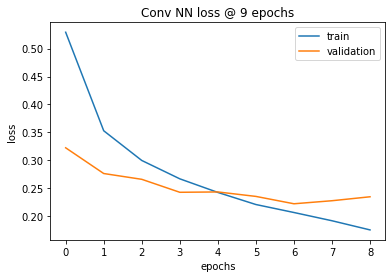

In [ ]:
# 7.2.3.3  합성곱 신경망 학습 결과 시각화 (훈련/검증데이터 손실 비교)

import matplotlib.pyplot as plt

plt.plot(history.history[ 'loss' ])  # 훈련 손실 'loss'
plt.plot(history.history[ 'val_loss' ])  # 검증 손실 'val_loss'

plt.title('Conv NN loss @ 9 epochs')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'validation'])
plt.show()

In [ ]:
# 7.2.3.4 합성곱 신경망 모델 성능 평가, 검증데이터로 evaluate
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 3ms/step - loss: 0.2225 - accuracy: 0.9203


[0.2224719375371933, 0.9203333258628845]

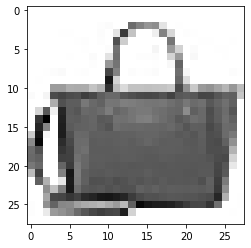

In [ ]:
# 7.2.3.5 합성곱 신경망을 이용한 예측을 위한 이미지 확인 (첫번째 항목)
plt.imshow(val_scaled[0].reshape(28,28), cmap = 'gray_r')
plt.show()

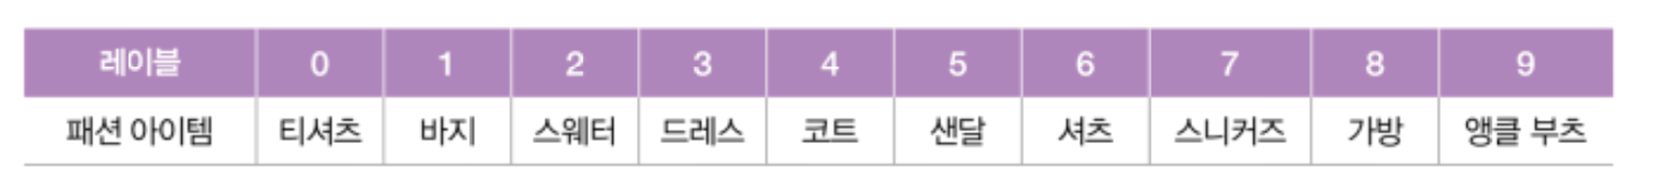

In [ ]:
# 7.2.3.6 합성곱 신경망을 이용한 예측

preds = model.predict(val_scaled[0:1])  # 검증데이터 형상 유지를 위해서 슬라이싱 (28,28,1)
print(preds)

[[2.4730771e-17 9.2256266e-22 9.9033281e-20 1.4777506e-17 1.9696641e-17
  2.2963356e-14 2.3665169e-16 1.7243956e-14 1.0000000e+00 2.5998835e-16]]


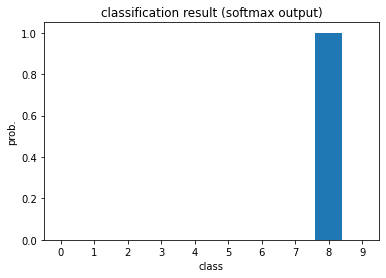

In [ ]:
# 7.2.3.8 막대 그래프로 출력값 확인
plt.bar(range(0,10), preds[0])
plt.title ( 'classification result (softmax output)')
plt.xlabel('class')
plt.ylabel('prob.')
plt.xticks ([0,1,2,3,4,5,6,7,8,9])
plt.xlim(-0.5, 9.5)
plt.show()

In [ ]:
# 7.2.3.9  예측결과 출력
classes = ['0:티셔츠','1:바지','2:스웨터','3:드레스','4:코트',
           '5:샌달', '6:셔츠','7:스니커트', '8:가방','9:앵클부츠']

import numpy as np
print ( classes[np.argmax(preds)] )

8:가방


In [ ]:
# 7.2.3.10 시험 데이터 (test_input, test_target)로 최종 검증
# 데이터 변형 : 정규화, 형상변경
test_scaled = test_input.reshape(-1,28,28,1)/255.0

# 시험데이터로 평가 
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 1s 4ms/step - loss: 0.2447 - accuracy: 0.9142


[0.2446572333574295, 0.9142000079154968]

## 7.3 합성곱 신경망의 시각화

### 사전 준비

In [ ]:
# 7.3.0.1 기존 학습 파일 생성하기

from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = \
  keras.datasets.fashion_mnist.load_data()

train_scaled = train_input.reshape(-1, 28,28,1) / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size =0.2, random_state=42
)

# initiate
model = keras.Sequential()
# first convolution
model.add (keras.layers.Conv2D(32, kernel_size = 3, activation = 'relu',
                    padding = 'same', input_shape=(28,28,1)))
# first Pooling
model.add(keras.layers.MaxPooling2D(2))

# 2nd convolution
model.add(keras.layers.Conv2D(64, kernel_size = 3, activation = 'relu',
                    padding = 'same'))
# 2nd pooling
model.add(keras.layers.MaxPooling2D(2))

# flatten
model.add(keras.layers.Flatten())
# hidden dense with dropout
model.add(keras.layers.Dense(100, activation = 'relu'))
model.add(keras.layers.Dropout(0.4))
# output layer
model.add(keras.layers.Dense(10, activation = 'softmax'))

model.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy',
              metrics = 'accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping (patience = 2,
                                                   restore_best_weights = True)
history = model.fit(train_scaled, train_target, epochs= 20,
                    validation_data=(val_scaled, val_target),
                    callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.5173 - accuracy: 0.8135 - val_loss: 0.3262 - val_accuracy: 0.8787
Epoch 2/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3470 - accuracy: 0.8761 - val_loss: 0.2998 - val_accuracy: 0.8898
Epoch 3/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3018 - accuracy: 0.8912 - val_loss: 0.2503 - val_accuracy: 0.9084
Epoch 4/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2681 - accuracy: 0.9032 - val_loss: 0.2392 - val_accuracy: 0.9118
Epoch 5/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2432 - accuracy: 0.9105 - val_loss: 0.2332 - val_accuracy: 0.9152
Epoch 6/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2246 - accuracy: 0.9180 - val_loss: 0.2355 - val_accuracy: 0.9135
Epoch 7/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2066 - accuracy: 0.9246 - val_loss: 0.2289 - val_accuracy:

In [ ]:
# 7.3.0.2 파일 생성 여부 확인
!ls -al *.h5

-rw-r--r-- 1 root root 4049416 Jul 17 10:19 best-cnn-model.h5


### 7.3.1 가중치 시각화  (가중치 필터 눈으로 확인하기)

In [ ]:
# 7.3.1.1 기존에 생성한 (현) 최선의 모델 적재하고 모델 계층 확인
from tensorflow import keras
model = keras.models.load_model('best-cnn-model.h5')
model.layers

In [ ]:
model.layers 

In [ ]:
# 7.3.1.2 첫번째 합성층 객체 object를 conv 변수에 할당하고 가중치 모양 확인
conv = model.layers[0]
print(conv.weights[0].shape, conv.weights[1].shape) # 커널 가중치, 편향

(3, 3, 1, 32) (32,)


In [ ]:
# 7.3.1.3  Convolution 객체 (Tensor object ) 확인
conv.weights  # Tensor object

[<tf.Variable 'conv2d_4/kernel:0' shape=(3, 3, 1, 32) dtype=float32, numpy=
 array([[[[ 0.36505422, -0.00301679, -0.3056968 ,  0.17326643,
            0.11205786,  0.08838793, -0.32582572, -0.02596977,
            0.04207235, -0.12757865, -0.1060351 , -0.28685027,
           -0.11268314, -0.3510612 , -0.1436134 ,  0.2609527 ,
           -0.2224512 ,  0.06429259, -0.24367079,  0.14526783,
            0.12469059, -0.6730387 , -1.1389706 , -0.0319544 ,
            0.03651398, -0.14252819, -0.31066972,  0.07518113,
            0.12192185,  0.00458451,  0.2401565 , -0.03983459]],
 
         [[-0.30246857, -0.13161935, -0.54295516, -0.0952976 ,
            0.24302365,  0.02175359,  0.17000857, -0.45359862,
           -0.17424315,  0.06228077, -0.09974695,  0.32756263,
            0.2748826 ,  0.178927  , -0.15590143,  0.22379664,
            0.09305258,  0.06698727, -0.30005714,  0.24493226,
           -0.28597754, -0.10546191, -1.0042983 ,  0.05331577,
           -0.15840262,  0.30197296,  

In [ ]:
# 7.3.1.4 첫 번째 합성곱층의 커널 필터의 평균과 편차 출력
conv_weights = conv.weights[0].numpy()
print( conv_weights.mean(), conv_weights.std())

-0.020259533 0.25279945


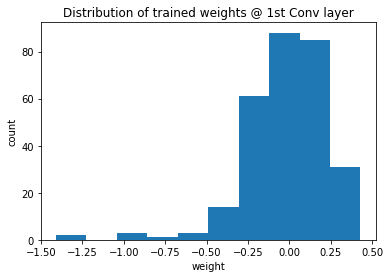

In [ ]:
# 7.3.1.5 첫 번째 합성곱층 커널 가중치의 분포 (훈련 후)
import matplotlib.pyplot as plt
plt.hist(conv_weights.reshape(-1,1))
plt.title('Distribution of trained weights @ 1st Conv layer')
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

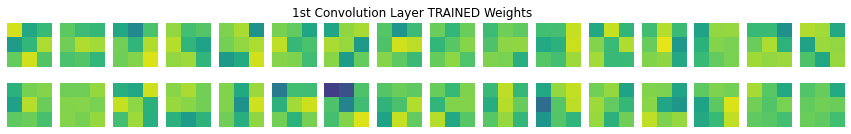

In [ ]:
# 8.3.1.6 훈련된 첫 번째 합성곱 층 필터들의 커널 정보를 출력해보자.

fig, axs = plt.subplots(2, 16, figsize = (15,2))
for i,  axe in enumerate (axs.flat) :
  axe.imshow(conv_weights[:,:,0,i], vmin = -1.5 , vmax = 0.5)
  axe.axis('off')

fig.suptitle ('1st Convolution Layer TRAINED Weights')
plt.show()


In [ ]:
# 7.3.1.7 첫 번째 합성곱층, 첫 번째 필터의 커널 정보
# 밝을 수록 큰 숫자

conv_weights[:,:,0,0]

array([[ 0.37805456,  0.00224739,  0.14110227],
       [ 0.05424614, -1.4082967 , -0.13151391],
       [-0.18335976, -1.3673025 , -0.2847036 ]], dtype=float32)

In [ ]:
# 7.3.1.8 훈련 전 커널 정보와 비교해보자.
#   동일한 조건의 합성곱 층을 갖는 모델을 새롭게 생성
no_training_model = keras.Sequential()
no_training_model.add(keras.layers.Conv2D(32, kernel_size = 3, 
                                          activation = 'relu',
                                          padding = 'same',
                                          input_shape = (28,28,1)))

In [ ]:
# 7.3.1.9  훈련 전 합성곱 층의 필터 가중치 변수 할당 및 형상 확인
no_training_conv = no_training_model.layers[0]
print(no_training_conv.weights[0].shape)

(3, 3, 1, 32)


In [ ]:
# 7.3.1.10 훈련 전 합성곱 층의 필터 가중치 초기값 분포
no_training_weights = no_training_conv.weights[0].numpy()
print ( no_training_weights.mean(), no_training_weights.std())

0.008045857 0.08105894


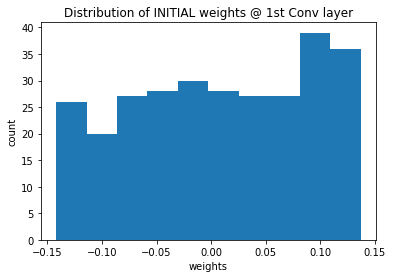

In [ ]:
# 7.3.1.11  훈련 전 합성곱 층의 필터 가중치 초기값 분포 시각화
plt.hist(no_training_weights.reshape(-1,1))
plt.title('Distribution of INITIAL weights @ 1st Conv layer')
plt.xlabel('weights')
plt.ylabel('count')
plt.show()

* 평균은 0에 가깝고, 표준편차는 작아졌으며,  -0.15~0.15 사이에  대략 균일하게 분포 되어 있다. 

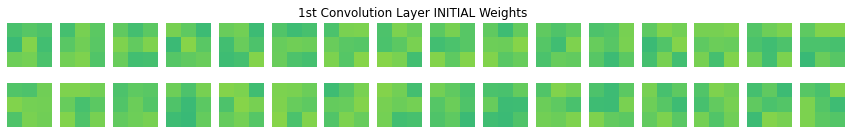

In [ ]:
# 7.3.1.12 훈련전 (초기값 상태) 첫 번째 합성곱 층 필터들의 커널 정보를 출력해보자.
fig, axs = plt.subplots(2,16, figsize = (15,2))
for i , axe in enumerate(axs.flat) :
  axe.imshow(no_training_weights[:,:,0,i], vmin=-1.5, vmax = 0.5)
  axe.axis('off')
fig.suptitle ('1st Convolution Layer INITIAL Weights')
plt.show()

* 훈련전 필터들의 가중치 값 (색상)의 분포가 훈련후 필터 대비 비슷한 색으로 평이하게 퍼져있다. 

### 7.3.2 함수형 API

In [ ]:
# 7.3.2.1 모델의 입력값 속성 확인
print(model.input)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='conv2d_4_input'), name='conv2d_4_input', description="created by layer 'conv2d_4_input'")


In [ ]:
# 7.3.2.2 입력층과 첫 번째 계층 (= 첫 번째 합성곱층)의 출력을 연결한 
conv_acti = keras.Model(model.input, model.layers[0].output)

In [ ]:
conv_acti

### 7.3.3 특성맵 시각화

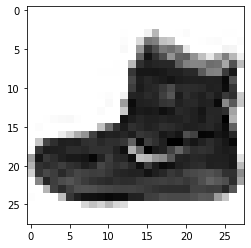

In [ ]:
# 7.3.3.1 패션 MNIST 데이터 적재 및 훈련세트의 첫 번째 샘플 출력

(train_input, train_target),(test_input, test_target) = \
  keras.datasets.fashion_mnist.load_data()
  
plt.imshow(train_input[0], cmap = 'gray_r')
plt.show()

# 배경은 0,  진한색은 255

In [ ]:
# 7.3.3.2 conv_acti 모델에 첫번째 샘플이미지를 주입하여 Conv2D 층이 만드는 특성맵을 출력
inputs = train_input[0:1].reshape(-1,28,28,1)/255.0
print(inputs.shape)
feature_maps = conv_acti.predict(inputs)

(1, 28, 28, 1)


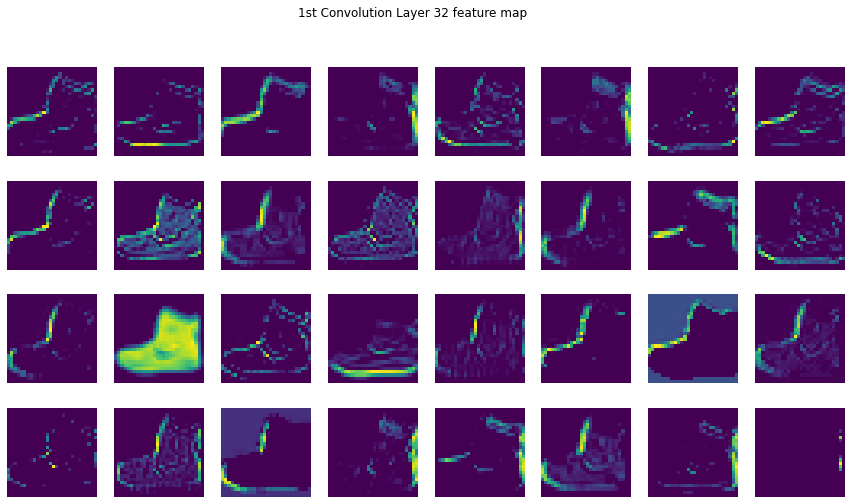

In [ ]:
# 7.3.3.3 첫 번째 합성곱 층의 특성맵 feature map 출력
#first layer feature map

fig, axs = plt.subplots(4,8, figsize = (15,8))
for i, axe in enumerate(axs.flat) :
  axe.imshow(feature_maps[0,:,:,i])
  axe.axis('off')
fig.suptitle ('1st Convolution Layer 32 feature map')
plt.show()

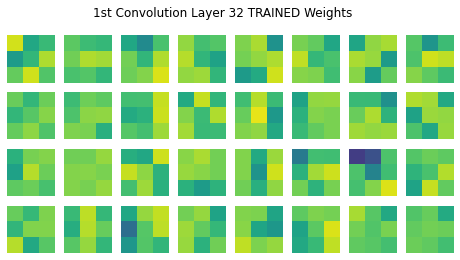

In [ ]:
# 7.3.3.4 첫 번째 합성곱 층의 가중치 다시 출력
# first layer filter
fig, axs = plt.subplots(4, 8, figsize = (8,4))
for i,  axe in enumerate (axs.flat) :
  axe.imshow(conv_weights[:,:,0,i], vmin = -1.5 , vmax = 0.5)
  axe.axis('off')
fig.suptitle ('1st Convolution Layer 32 TRAINED Weights')
plt.show()

In [ ]:
# 7.3.3.5 두 번째 합성곱 층에 대해서도 동일한 요령으로 특성맵과 가중치를 출력 
# 이번에는 input 데이터에서 두 번째 합성곱 층까지의 실행 결과를 생성한다. 

conv2_acti = keras.Model(model.input, model.layers[2].output)
feature_maps_2 = conv2_acti.predict (inputs)

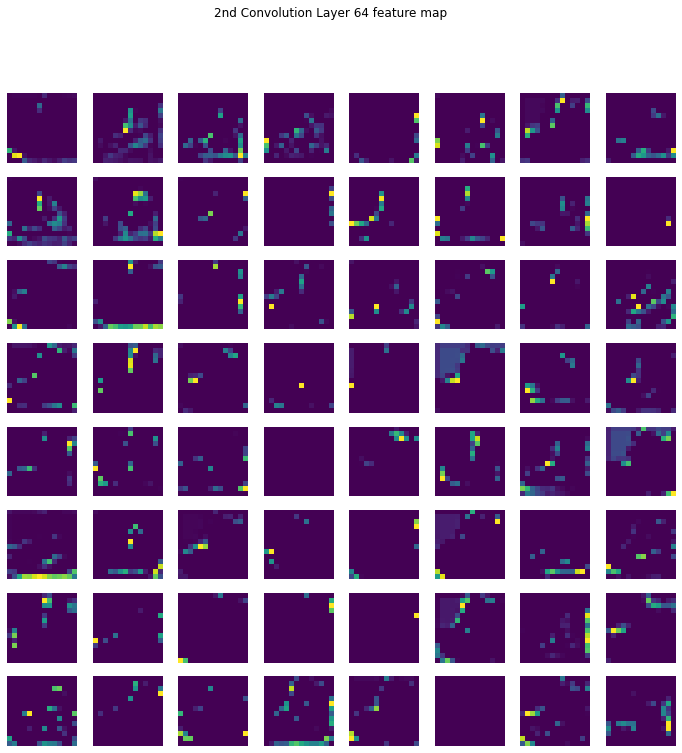

In [ ]:
# 7.3.3.6  두 번째 합성곱 층의 특성맵 feature map 64개 출력
fig, axs = plt.subplots(8,8, figsize = (12,12))
for i, axe in enumerate(axs.flat):
  axe.imshow(feature_maps_2[0,:,:,i])
  axe.axis('off')

fig.suptitle ('2nd Convolution Layer 64 feature map')
plt.show()